# 1. scaling

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")

In [5]:
df.to_csv("social_net_ads.csv",index=False)

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [8]:
df=df.iloc[:,2:]

In [9]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


# train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


In [13]:
df.drop("Purchased",axis=1)

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [15]:
df["Purchased"]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [20]:
df.shape

(400, 3)

In [18]:
X_train,X_test,y_train,y_testtrain_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.25)

In [19]:
X_train

,Age,EstimatedSalary
311,39.0,96000.0
281,35.0,61000.0
379,58.0,23000.0
337,35.0,79000.0
292,55.0,39000.0
...,...,...
70,25.0,80000.0
137,30.0,107000.0
392,45.0,45000.0
253,37.0,146000.0


In [21]:
X_test

,Age,EstimatedSalary
169,29.0,47000.0
156,46.0,59000.0
241,38.0,59000.0
298,45.0,79000.0
303,37.0,79000.0
...,...,...
141,18.0,68000.0
106,26.0,35000.0
88,26.0,81000.0
195,34.0,43000.0


In [26]:
y_train

311    1
281    0
379    1
337    0
292    1
      ..
70     0
137    1
392    1
253    1
286    0
Name: Purchased, Length: 300, dtype: int64

In [27]:
y_test

169    0
156    0
241    0
298    0
303    1
      ..
141    0
106    0
88     0
195    0
357    0
Name: Purchased, Length: 100, dtype: int64

# StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [29]:
X_train_sclaed=scaler.transform(X_train)

In [30]:
X_test_sclaed=scaler.transform(X_test)

In [33]:
X_train_scaled=pd.DataFrame(X_train_sclaed,columns=X_train.columns)

In [34]:
X_train

,Age,EstimatedSalary
311,39.0,96000.0
281,35.0,61000.0
379,58.0,23000.0
337,35.0,79000.0
292,55.0,39000.0
...,...,...
70,25.0,80000.0
137,30.0,107000.0
392,45.0,45000.0
253,37.0,146000.0


In [36]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,38.036667,70836.666667
std,10.354356,35343.559709
min,18.000000,15000.000000
25%,30.000000,42750.000000
50%,37.000000,71000.000000
75%,46.000000,89000.000000
max,60.000000,150000.000000


In [35]:
X_train_scaled

,Age,EstimatedSalary
0,0.093192,0.713153
1,-0.293764,-0.278781
2,1.931234,-1.355738
3,-0.293764,0.231357
4,1.641017,-0.902282
...,...,...
295,-1.261155,0.259698
296,-0.777460,1.024904
297,0.673626,-0.732236
298,-0.100286,2.130202


In [38]:
import numpy as np
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.2


# Effect of scaling

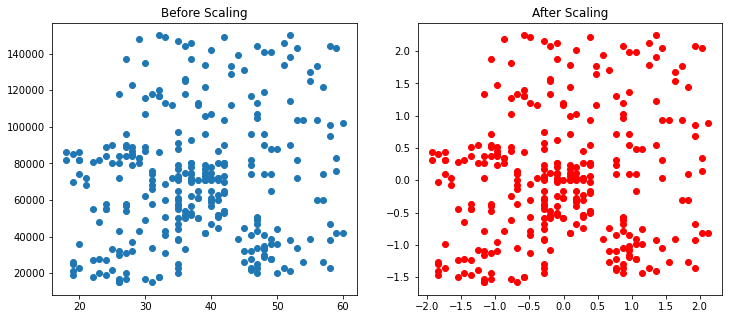

In [41]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

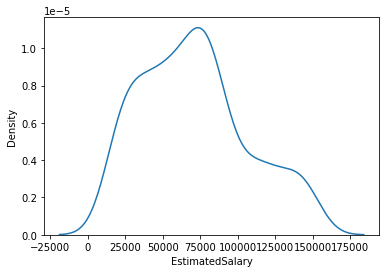

In [42]:
# model 
import seaborn as sns
sns.kdeplot(X_train['EstimatedSalary'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

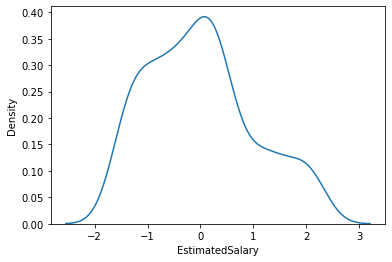

In [43]:
# model 
import seaborn as sns
sns.kdeplot(X_train_scaled['EstimatedSalary'])

In [54]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,38.036667,70836.666667
std,10.354356,35343.559709
min,18.000000,15000.000000
25%,30.000000,42750.000000
50%,37.000000,71000.000000
75%,46.000000,89000.000000
max,60.000000,150000.000000


In [44]:
# min-max

from sklearn.preprocessing import MinMaxScaler

scler_min_max=MinMaxScaler()

In [45]:
scler_min_max.fit(X_train)

MinMaxScaler()

In [49]:
X_train_min_max=scler_min_max.transform(X_train)

In [50]:
X_test_min_max=scler_min_max.transform(X_test)

In [51]:
X_train_min_max = pd.DataFrame(X_train_min_max, columns=X_train.columns)
X_test_min_max = pd.DataFrame(X_test_min_max, columns=X_test.columns)

In [56]:
np.round(X_train_min_max.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


In [53]:
X_test_min_max

,Age,EstimatedSalary
0,0.261905,0.237037
1,0.666667,0.325926
2,0.476190,0.325926
3,0.642857,0.474074
4,0.452381,0.474074
...,...,...
95,0.000000,0.392593
96,0.190476,0.148148
97,0.190476,0.488889
98,0.380952,0.207407


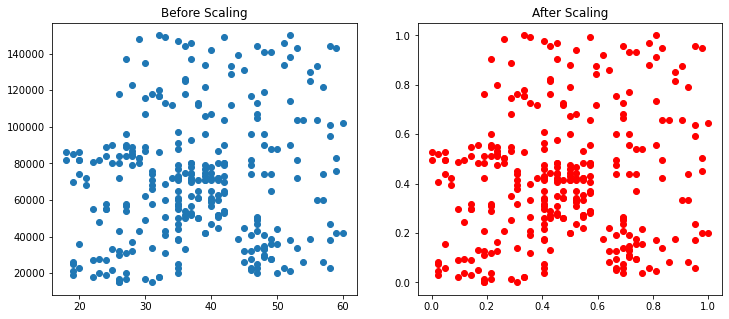

In [57]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_min_max['Age'], X_train_min_max['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

# when we should use which technique

In [ ]:
CGPA=0 to 1 min-max for the specific range you can use min-max

SALARY= if you dont know the range of the data you can use std_scaler

# ENCODING

In [94]:
df2=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")

In [60]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [61]:
df2.to_csv("custmor.csv",index=False)

In [62]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [64]:
df2.sample(5)

,age,gender,review,education,purchased
7,60,Female,Poor,School,Yes
10,98,Female,Good,UG,Yes
30,73,Male,Average,UG,No
29,83,Female,Average,UG,Yes
26,53,Female,Poor,PG,No


In [67]:
df2=df2.iloc[:,2:-1]

In [68]:
df2.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


In [77]:
df2.shape

(50, 2)

In [73]:
X_train,X_test=train_test_split(df2,test_size=0.25)

In [74]:
X_train

,review,education
45,Poor,PG
32,Average,UG
22,Poor,PG
33,Good,PG
29,Average,UG
4,Average,UG
26,Poor,PG
20,Average,School
34,Average,School
49,Good,UG


In [76]:
X_test

,review,education
16,Poor,UG
24,Average,PG
42,Good,PG
25,Good,School
48,Good,UG
1,Poor,UG
38,Good,School
27,Poor,PG
30,Average,UG
35,Poor,School


In [79]:
df2["review"].value_counts()

Poor       18
Good       18
Average    14
Name: review, dtype: int64

In [80]:
df2["education"].value_counts()

PG        18
School    16
UG        16
Name: education, dtype: int64

In [69]:
 from sklearn.preprocessing import OrdinalEncoder

In [83]:
encoder=OrdinalEncoder(categories=[['Poor','Average','Good'],["School","UG","PG"]])

In [88]:
encoder.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [89]:
X_train_encode=encoder.transform(X_train)

In [90]:
X_train_encode

array([[0., 2.],
       [1., 1.],
       [0., 2.],
       [2., 2.],
       [1., 1.],
       [1., 1.],
       [0., 2.],
       [1., 0.],
       [1., 0.],
       [2., 1.],
       [2., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [2., 0.],
       [1., 1.],
       [2., 0.],
       [2., 0.],
       [1., 2.],
       [2., 2.],
       [1., 0.],
       [2., 2.],
       [0., 2.],
       [0., 1.],
       [0., 2.],
       [0., 0.],
       [0., 2.],
       [2., 0.],
       [0., 0.],
       [1., 0.],
       [2., 1.],
       [1., 2.],
       [0., 2.],
       [2., 2.],
       [2., 1.],
       [0., 0.],
       [2., 1.]])

In [91]:
encoder.transform(X_test)

array([[0., 1.],
       [1., 2.],
       [2., 2.],
       [2., 0.],
       [2., 1.],
       [0., 1.],
       [2., 0.],
       [0., 2.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [2., 2.],
       [0., 2.]])

In [95]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [98]:
df2=df2[["gender","age"]]

In [99]:
df2

,gender,age
0,Female,30
1,Female,68
2,Female,70
3,Female,72
4,Female,16
5,Female,31
6,Male,18
7,Female,60
8,Female,65
9,Male,74


In [100]:
from sklearn.preprocessing import OneHotEncoder

In [110]:
ohe=OneHotEncoder(drop="first",sparse=False,dtype=np.int32)

In [111]:
ohe.fit(df2[["gender"]])

OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse=False)

In [112]:
ohe.transform(df2[["gender"]])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [136]:
# handle missing value

df3=pd.read_csv("titanic_train.csv")

In [137]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [119]:
df3=df3[["Age","Fare","SibSp","Survived"]]

In [138]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [120]:
df3.head()

,Age,Fare,SibSp,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [121]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [124]:
df3.isnull().mean()

Age         0.198653
Fare        0.000000
SibSp       0.000000
Survived    0.000000
dtype: float64

In [ ]:
# numeric--> mean,median

# cat--> mode

In [125]:
X_train,X_test=train_test_split(df3,test_size=0.25)

In [126]:
X_train

,Age,Fare,SibSp,Survived
132,47.0,14.5000,1,0
249,54.0,26.0000,1,0
887,19.0,30.0000,0,1
287,22.0,7.8958,0,0
199,24.0,13.0000,0,0
...,...,...,...,...
716,38.0,227.5250,0,1
133,29.0,26.0000,1,1
366,60.0,75.2500,1,1
574,16.0,8.0500,0,0


In [127]:
X_test

,Age,Fare,SibSp,Survived
173,21.0,7.9250,0,0
358,NaN,7.8792,0,1
513,54.0,59.4000,1,1
784,25.0,7.0500,0,0
134,25.0,13.0000,0,0
...,...,...,...,...
857,51.0,26.5500,0,1
482,50.0,8.0500,0,0
261,3.0,31.3875,4,1
241,NaN,15.5000,1,1


In [130]:
mean_age=X_train["Age"].mean()

In [131]:
X_train["Age"].fillna(mean_age)

132    47.0
249    54.0
887    19.0
287    22.0
199    24.0
       ... 
716    38.0
133    29.0
366    60.0
574    16.0
762    20.0
Name: Age, Length: 668, dtype: float64

In [133]:
X_train["Age"].fillna(mean_age).isnull().sum()

0

In [134]:
mediann_age=X_train["Age"].median()

In [135]:
X_train["Age"].fillna(mediann_age)

132    47.0
249    54.0
887    19.0
287    22.0
199    24.0
       ... 
716    38.0
133    29.0
366    60.0
574    16.0
762    20.0
Name: Age, Length: 668, dtype: float64

In [ ]:
#sklearn

# simpleimputer

In [141]:
df3["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [142]:
df3["Cabin"].fillna(df3["Cabin"].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [ ]:
# multivariate

# knnimputer

# Outlier handling and detection

In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
df.to_csv("placement.csv",index=False)

In [6]:
df.sample(5)

,cgpa,placement_exam_marks,placed
92,6.48,63.0,0
907,7.03,44.0,1
57,7.73,24.0,0
868,7.33,36.0,0
601,6.89,17.0,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,1000.0,6.96124,0.615898,4.89,6.55,6.96,7.37,9.12
placement_exam_marks,1000.0,32.22500,19.130822,0.00,17.00,28.00,44.00,100.00
placed,1000.0,0.48900,0.500129,0.00,0.00,0.00,1.00,1.00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


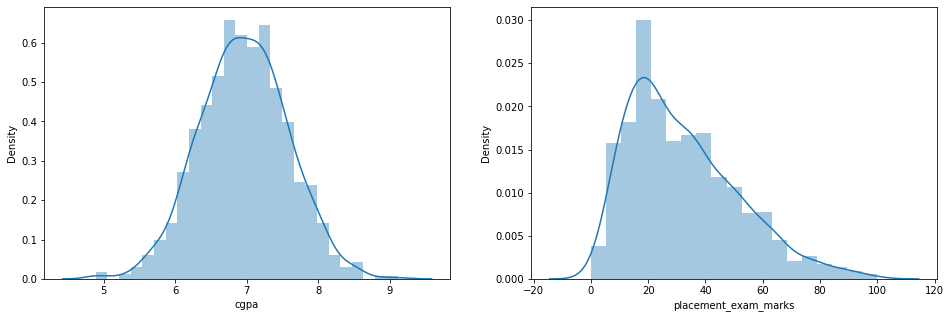

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [13]:
df["placement_exam_marks"].skew()

0.8356419499466834

In [14]:
df["placement_exam_marks"].mean()

32.225

In [15]:
df["cgpa"].mean()

6.96124000000001

In [16]:
df["cgpa"].std()

0.6158978751323894

In [17]:
df["cgpa"].min()

4.89

In [18]:
df["cgpa"].max()

9.12

In [19]:
df['cgpa'].mean() + 3*df['cgpa'].std()

8.808933625397177

In [20]:
df['cgpa'].mean() - 3*df['cgpa'].std()

5.113546374602842

In [22]:
df[df["cgpa"]>8.80]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


In [23]:
df[df["cgpa"]<5.11]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [24]:
df[(df["cgpa"]>8.80 ) | (df["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [28]:
new_df=df[(df["cgpa"]<8.80 ) & (df["cgpa"]>5.11)]

In [30]:
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

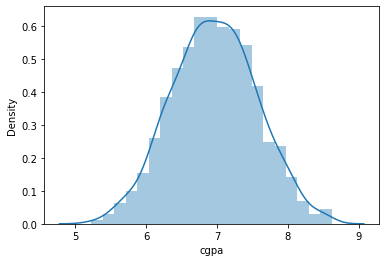

In [31]:
sns.distplot(new_df['cgpa'])

# Capping

In [32]:
upper_limit=df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit=df['cgpa'].mean() - 3*df['cgpa'].std()

In [35]:
import numpy as np
np.where(df["cgpa"]>upper_limit,upper_limit, np.where(df["cgpa"]<lower_limit,lower_limit,df["cgpa"]))

array([7.19      , 7.46      , 7.54      , 6.42      , 7.23      ,
       7.3       , 6.69      , 7.12      , 6.45      , 7.75      ,
       6.82      , 6.38      , 6.58      , 5.68      , 7.91      ,
       7.1       , 6.53      , 7.56      , 6.93      , 7.63      ,
       6.69      , 7.43      , 6.76      , 6.05      , 6.44      ,
       6.28      , 7.45      , 6.53      , 7.23      , 6.51      ,
       7.46      , 7.66      , 5.91      , 6.23      , 8.15      ,
       7.48      , 6.85      , 8.51      , 6.58      , 7.25      ,
       6.6       , 6.7       , 7.46      , 7.85      , 7.88      ,
       6.92      , 7.3       , 6.92      , 6.29      , 8.23      ,
       6.2       , 6.24      , 7.53      , 6.69      , 8.42      ,
       8.12      , 6.93      , 7.73      , 7.34      , 7.7       ,
       7.94      , 7.51      , 7.61      , 6.22      , 6.98      ,
       6.27      , 6.67      , 8.04      , 6.58      , 7.41      ,
       6.98      , 6.13      , 7.9       , 6.39      , 6.16   

In [43]:
df["cgpa"]=np.where(df["cgpa"]>upper_limit,upper_limit,df["cgpa"])

ValueError: either both or neither of x and y should be given

In [44]:
df["cgpa"]=np.where(df["cgpa"]<lower_limit,lower_limit,df["cgpa"])

In [45]:
df["cgpa"].max()

8.808933625397177

In [46]:
df["cgpa"].min()

5.113546374602842

In [47]:
upper_limit

8.808933625397177

In [48]:
lower_limit

5.113546374602842

In [50]:
df.shape

(1000, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

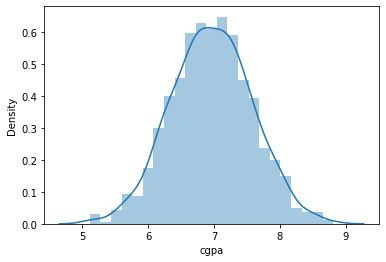

In [51]:
sns.distplot(df['cgpa'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

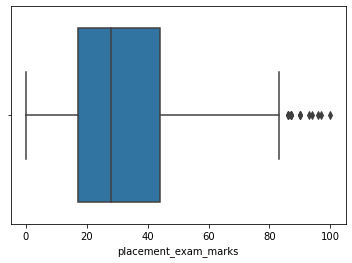

In [53]:
sns.boxplot(df['placement_exam_marks'])

In [59]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [60]:
percentile25

17.0

In [56]:
percentile75

44.0

In [61]:
iqr=percentile75-percentile25

In [62]:
iqr

27.0

In [63]:
lower_fence=percentile25 - 1.5 * iqr
upper_fence=percentile75 + 1.5 * iqr

In [65]:
lower_fence

-23.5

In [64]:
upper_fence

84.5

In [67]:
df[df['placement_exam_marks'] > upper_fence]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [68]:
df[df['placement_exam_marks'] < lower_fence]

,cgpa,placement_exam_marks,placed


In [70]:
new_df=df[df['placement_exam_marks'] <= upper_fence]

In [71]:
new_df.shape

(985, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

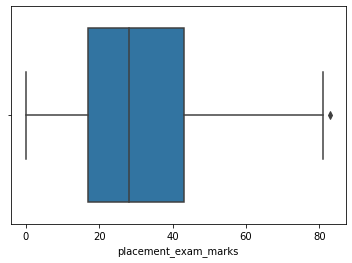

In [72]:
sns.boxplot(new_df['placement_exam_marks'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

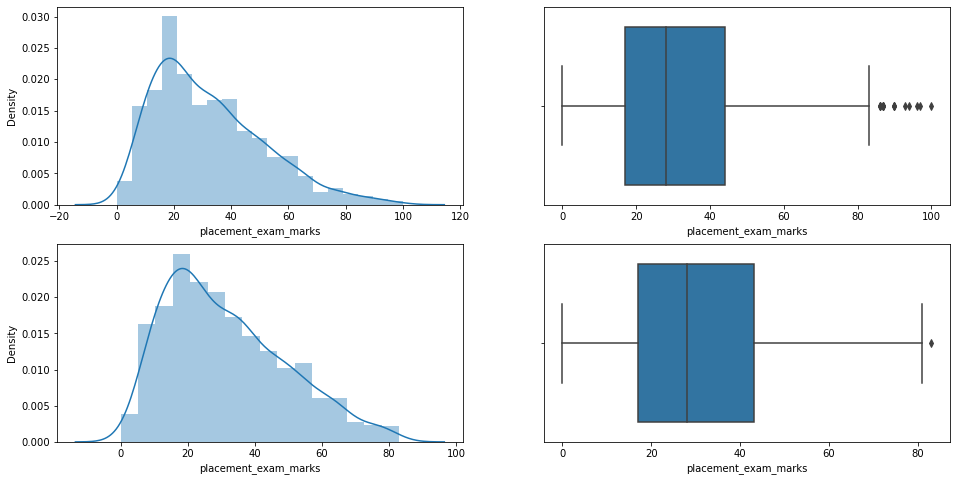

In [73]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

# capping method on top of this col(placement exam marks)

# percentile method

In [ ]:
percentile10 = df['placement_exam_marks'].quantile(0.10)
percentile85 = df['placement_exam_marks'].quantile(0.85)

In [74]:

df = sns.load_dataset("tips")

In [75]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


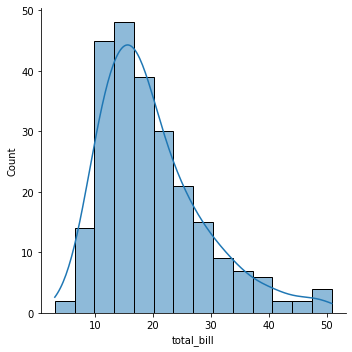

In [77]:
sns.displot(df.total_bill,kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

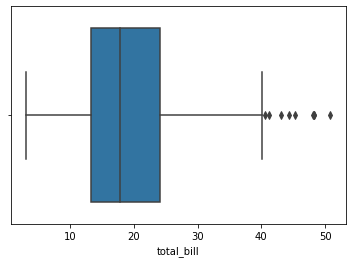

In [78]:
sns.boxplot(df.total_bill)

In [80]:
df.total_bill.skew()*100

113.32130376158204

<AxesSubplot:xlabel='total_bill'>

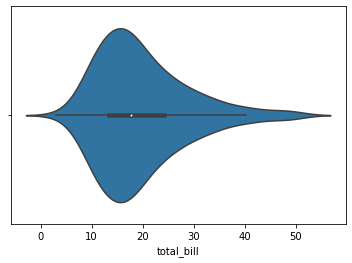

In [82]:
sns.violinplot(x=df.total_bill, inner="box")